# Binary Classification using Logistic Regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files

In [4]:
files.upload()

Saving bank_churn.csv to bank_churn.csv


{'bank_churn.csv': b'ID,active_member,age,balance,country,credit_card,gender,churn\n0,0,31,39539.39,0,0,1,0\n1,0,47,121376.15,0,1,0,1\n2,0,46,122051.98114195012,1,1,0,1\n3,0,37,0.0,2,0,1,0\n4,0,35,133026.53492339345,1,1,0,1\n5,0,58,157086.6341014764,0,0,0,1\n6,0,33,141816.25,1,1,0,1\n7,0,27,155879.09,0,0,0,0\n8,1,72,121215.9,0,1,0,0\n9,1,55,0.0,0,1,0,1\n10,1,52,0.0,2,0,1,0\n11,0,49,143320.95716186354,0,0,0,1\n12,0,36,107279.62959101744,1,1,0,1\n13,0,28,150329.15,1,1,1,0\n14,0,51,170474.19574550595,0,0,1,1\n15,0,50,0.0,0,1,1,1\n16,0,49,118139.79514056206,0,1,1,1\n17,1,29,103417.74,0,1,0,0\n18,1,53,139687.66,1,1,0,0\n19,1,57,116936.81,1,1,0,0\n20,1,38,142316.14,1,1,1,0\n21,0,45,0.0,0,0,1,0\n22,0,34,57317.38983064624,2,1,0,1\n23,1,39,135139.33,0,0,0,0\n24,0,52,0.0,0,1,1,1\n25,1,42,0.0,1,0,0,1\n26,0,27,111348.15,1,1,1,0\n27,1,36,0.0,0,1,1,0\n28,0,34,130643.88801492887,1,1,0,1\n29,0,40,68155.59,0,1,1,0\n30,0,51,148074.79,1,1,0,1\n31,0,45,0.0,0,1,0,0\n32,0,50,0.0,1,0,0,1\n33,1,36,97786.08,0,

In [6]:
df = pd.read_csv('bank_churn.csv')

In [7]:
df.shape

(600, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             600 non-null    int64  
 1   active_member  600 non-null    int64  
 2   age            600 non-null    int64  
 3   balance        600 non-null    float64
 4   country        600 non-null    int64  
 5   credit_card    600 non-null    int64  
 6   gender         600 non-null    int64  
 7   churn          600 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 37.6 KB


In [9]:
df.describe()

,ID,active_member,age,balance,country,credit_card,gender,churn
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.386667,41.448333,84874.486341,0.615000,0.603333,0.425000,0.500000
std,173.349358,0.487393,10.908513,62900.293847,0.721787,0.489614,0.494755,0.500417
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.750000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.500000,0.000000,41.000000,107688.905000,0.000000,1.000000,0.000000,0.500000
75%,449.250000,1.000000,49.000000,134839.800930,1.000000,1.000000,1.000000,1.000000
max,599.000000,1.000000,78.000000,206868.780000,2.000000,1.000000,1.000000,1.000000


In [10]:
df.head()

,ID,active_member,age,balance,country,credit_card,gender,churn
0,0,0,31,39539.390000,0,0,1,0
1,1,0,47,121376.150000,0,1,0,1
2,2,0,46,122051.981142,1,1,0,1
3,3,0,37,0.000000,2,0,1,0
4,4,0,35,133026.534923,1,1,0,1


In [11]:
df.tail()

,ID,active_member,age,balance,country,credit_card,gender,churn
595,595,1,78,0.000000,2,0,0,0
596,596,0,41,122762.324496,1,1,0,1
597,597,0,35,121015.215760,1,0,0,1
598,598,0,42,141840.943887,0,0,0,1
599,599,0,37,148829.024971,1,1,1,1


In [12]:
features = ['active_member', 'age', 'balance', 'country', 'credit_card', 'gender']
target = 'churn'

In [13]:
X = df[features]
y = df[target]

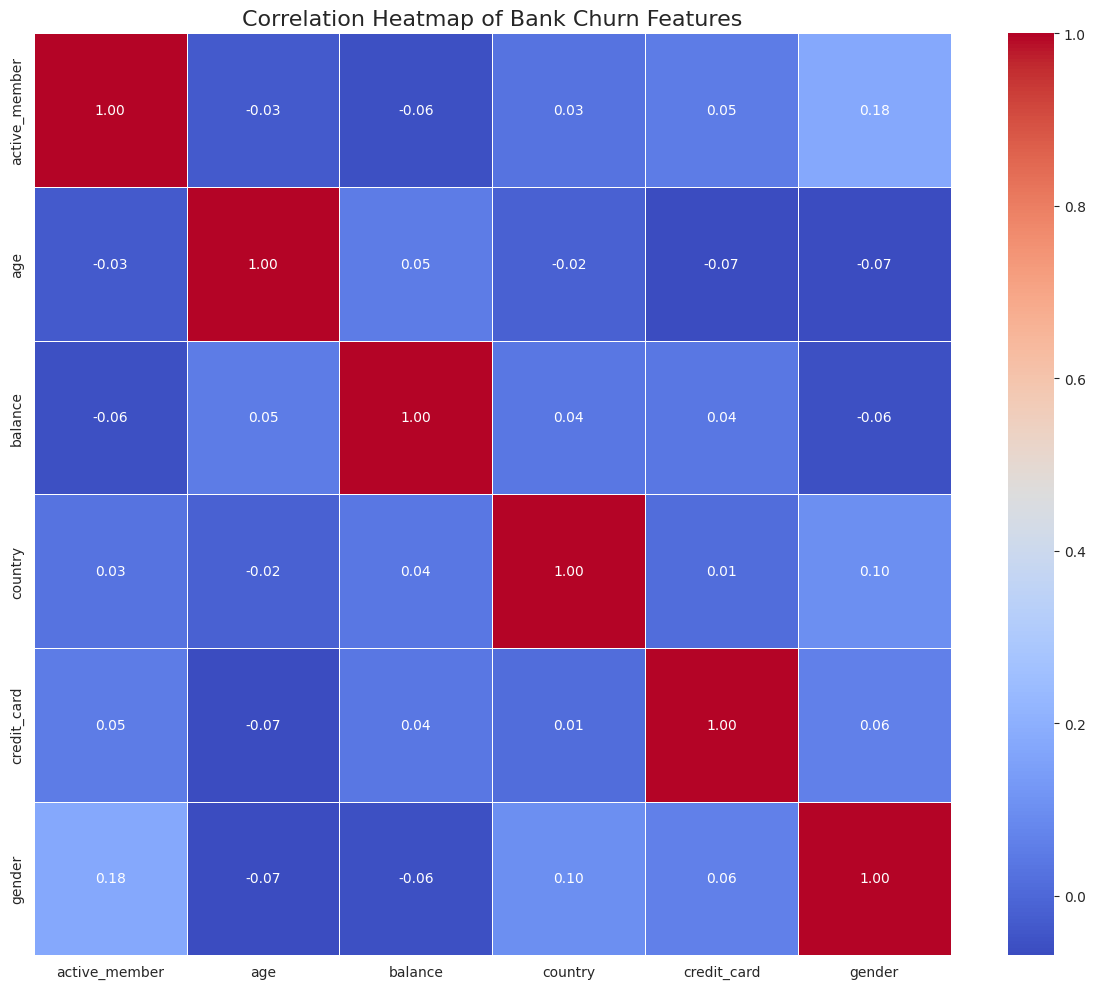

In [71]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Bank Churn Features', fontsize=16)
plt.tight_layout()
plt.savefig('bank_churn_correlation_heatmap.png')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model = LogisticRegression(random_state=80)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=80)

In [50]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [51]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [55]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\n" + "="*30 + "\n")

Accuracy: 0.8333

Confusion Matrix:
[[51 11]
 [ 9 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        62
           1       0.82      0.84      0.83        58

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120





In [56]:
predictions_df = pd.DataFrame({
    'Actual_Churn': y_test.reset_index(drop=True),
    'Predicted_Churn': y_pred,
    'Predicted_Churn_Probability': y_pred_proba
})

In [57]:
context_df = X_test.reset_index(drop=True)
results_df = pd.concat([context_df, predictions_df], axis=1)

In [58]:
results_df.to_csv('churn_predictions.csv', index=False)

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-1658314564.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='churn', data=df, palette='pastel')


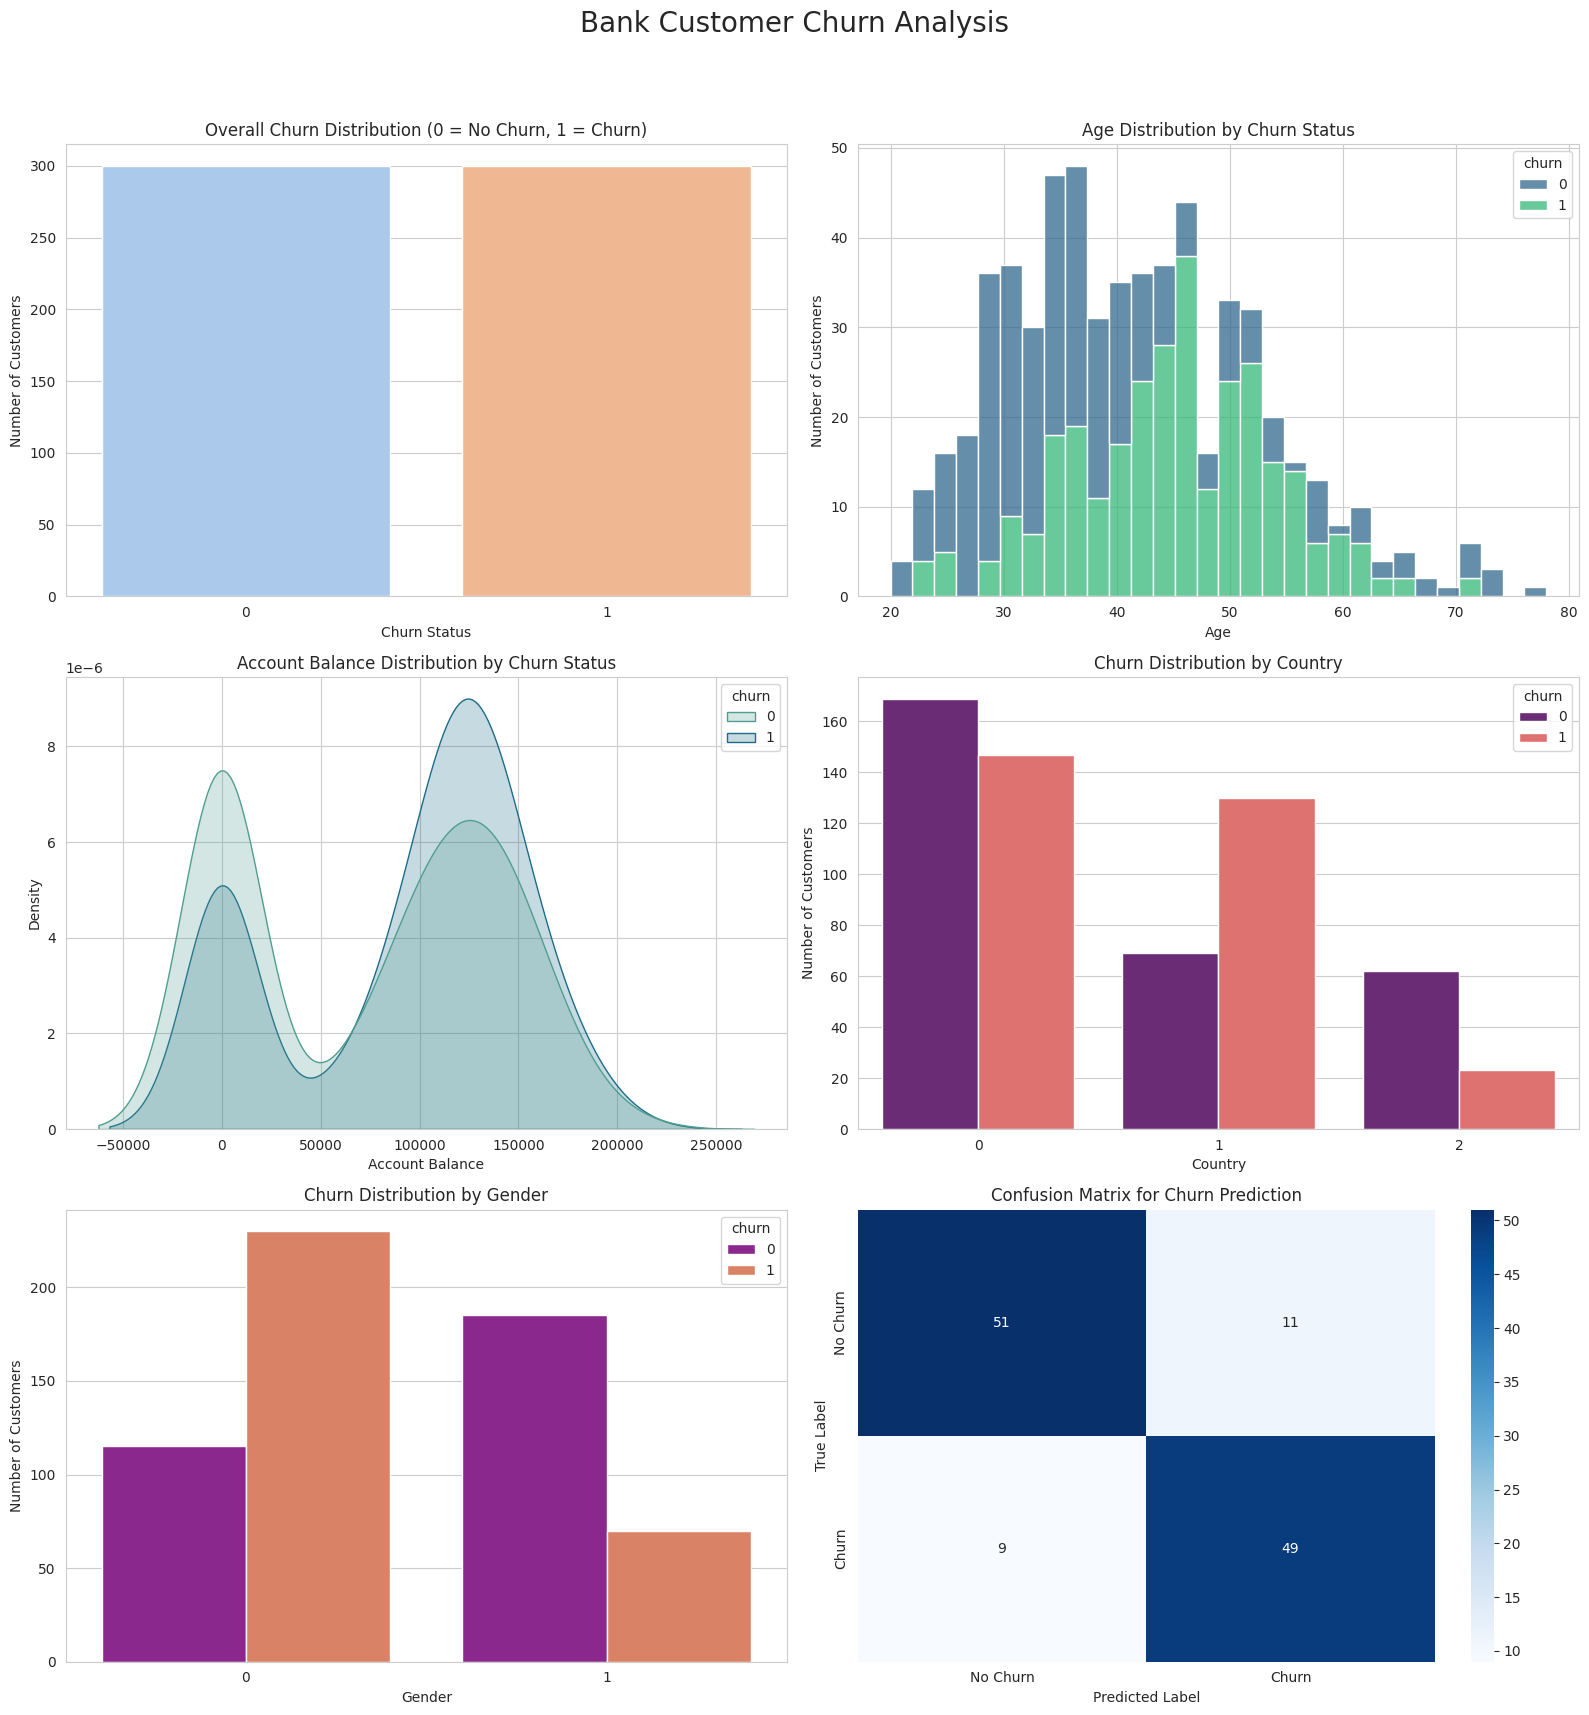

In [69]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Bank Customer Churn Analysis', fontsize=20)

# Plot 1: Churn Distribution (Count Plot)
sns.countplot(ax=axes[0, 0], x='churn', data=df, palette='pastel')
axes[0, 0].set_title('Overall Churn Distribution (0 = No Churn, 1 = Churn)')
axes[0, 0].set_xlabel('Churn Status')
axes[0, 0].set_ylabel('Number of Customers')

# Plot 2: Age Distribution by Churn (Histogram)
sns.histplot(ax=axes[0, 1], data=df, x='age', hue='churn', multiple='stack', palette='viridis', bins=30)
axes[0, 1].set_title('Age Distribution by Churn Status')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Number of Customers')

# Plot 3: Balance Distribution by Churn (KDE Plot)
sns.kdeplot(ax=axes[1, 0], data=df, x='balance', hue='churn', fill=True, common_norm=False, palette='crest')
axes[1, 0].set_title('Account Balance Distribution by Churn Status')
axes[1, 0].set_xlabel('Account Balance')
axes[1, 0].set_ylabel('Density')

# Plot 4: Churn by Country (Count Plot)
sns.countplot(ax=axes[1, 1], x='country', hue='churn', data=df, palette='magma')
axes[1, 1].set_title('Churn Distribution by Country')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Number of Customers')

# Plot 5: Churn by Gender (Count Plot)
sns.countplot(ax=axes[2, 0], x='gender', hue='churn', data=df, palette='plasma')
axes[2, 0].set_title('Churn Distribution by Gender')
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Number of Customers')

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[2, 1], xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[2, 1].set_title('Confusion Matrix for Churn Prediction')
axes[2, 1].set_xlabel('Predicted Label')
axes[2, 1].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('bank_churn_visualizations.png')
plt.show()